# How can the company improve collaboration?

## 📖 Background
You work in the analytics department of a multinational company, and the head of HR wants your help mapping out the company's employee network using message data. 

They plan to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

## 💾 The data

The company has six months of information on inter-employee communication. For privacy reasons, only sender, receiver, and message length information are available [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

## Executive Summary

The aim of this study is to create an employee network using message data and use this network to gain insight on relationships among employess and departments. Below are a few important points
* Network is based on employee message data from a period of 6 months mostly June & July 2021. Includes employee department, location and age information
* **Sales and Operations** are most **active** deparments, with highest connections, whereas **Engineering and Marketing** departments have have **less connections**.
* Our company can boost cross-functional cooperation if it can focus on increasing connections of IT, Engineering and Marketing departments, so that they can play a more central role in the overall organization network. 
* Centrality metrics show that in employees in mid-ages have a lot more connections. Increasing connections of younger and senior employees would be useful for knowledge transfer within the organization. 

## Initial Data Analysis

- Load data from csv files and examine

In [228]:
%%capture
!pip install nxviz
!pip install colour

#Supress Warnings
import warnings
warnings.filterwarnings("ignore")

#Import Necessary Modules
import pandas as pd
pd.set_option('display.float_format','{:.2f}'.format)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import nxviz as nv
from nxviz import plots, annotate
from colour import Color
from matplotlib.patches import Patch

#Load pandas dataframes
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')

In [229]:
print('EMPLOYEE DE')
employees.describe(include=object).T

EMPLOYEE DE


,count,unique,top,freq
department,664,6,Sales,161
location,664,5,US,277


- 664 employess in total
- 6 departments with **Sales** having most employees
- 5 locations with **US** having most employess

In [230]:
print(f'Employee Age')
print(employees['age'].describe())

Employee Age
count   664.00
mean     40.92
std      10.49
min      22.00
25%      33.00
50%      40.00
75%      50.00
max      59.00
Name: age, dtype: float64


- Average age is 40, with oldest being 59.
- It is normally distributed, with a std_dev of 10 years

In [231]:
print('Message and Unique Employee Count by Month')
messages.resample('M', on='timestamp')['sender'].agg(['count', 'nunique'])

Message and Unique Employee Count by Month


,count,nunique
timestamp,,
2021-06-30,1933,53
2021-07-31,1218,62
2021-08-31,88,21
2021-09-30,107,13
2021-10-31,90,16
2021-11-30,76,9


- Message are from 6 months mostly June & July 2021

In [232]:
print('Average Message Length by Month')
messages.resample('M', on='timestamp')['message_length'].agg(['mean', 'median'])

Average Message Length by Month


,mean,median
timestamp,,
2021-06-30,48.02,48.00
2021-07-31,49.15,49.00
2021-08-31,49.53,49.50
2021-09-30,49.24,48.00
2021-10-31,47.49,46.00
2021-11-30,47.05,45.50


* Average message length seems to be constant during time

## Create Graph 

* Since main objective is to see connections, we created a non directional graph. 
* Nodes --> Employees  &  Messages --> Edges
* We also calculated an edge weight for number of messages and added average message length as another property 

In [233]:
#Create an empty graph (non-directional)
G = nx.Graph()

#Create seperate node for employees with properties: department, location and age
for i, row in employees.iterrows():
    G.add_node(row['id'], department=row['department'], location=row['location'], age=row['age'])
    
#Create edges for messages between employees with properties: message length, timestamp, weight
for i, row in messages.iterrows():
    edge_exists = False
    for s, r, d in G.edges(data=True):
        if s == row['sender'] and r == row['receiver']:
            d['timestamp'] = max(row['timestamp'], d['timestamp'])
            d['weight'] = d['weight']+1
            d['message_length'] = (row['message_length'] + d['message_length']) / d['weight'] 
            edge_exists = True
    if not edge_exists:
        G.add_edge(row['sender'], row['receiver'], timestamp=row['timestamp'], message_length=row['message_length'], weight=1)

print('New graph updated with below details\n')        
        
print(f'Number of Nodes: {len(G.nodes)}\nNumber of Edges: {len(G.edges)}')
        
print('\nSample Nodes')
for i in list(G.nodes(data=True))[:5]:
    print(i)

print('\nSample Edges')
for i in list(G.edges(data=True))[:5]:
    print(i)

New graph updated with below details

Number of Nodes: 664
Number of Edges: 1114

Sample Nodes
(3, {'department': 'Operations', 'location': 'US', 'age': 33})
(6, {'department': 'Sales', 'location': 'UK', 'age': 50})
(8, {'department': 'IT', 'location': 'Brasil', 'age': 54})
(9, {'department': 'Admin', 'location': 'UK', 'age': 32})
(12, {'department': 'Operations', 'location': 'Brasil', 'age': 51})

Sample Edges
(3, 221, {'timestamp': Timestamp('2021-06-07 00:20:17'), 'message_length': 20, 'weight': 1})
(3, 1510, {'timestamp': Timestamp('2021-07-20 01:41:37'), 'message_length': 73, 'weight': 1})
(3, 1317, {'timestamp': Timestamp('2021-08-24 01:16:09'), 'message_length': 68, 'weight': 1})
(3, 144, {'timestamp': Timestamp('2021-08-30 01:09:00'), 'message_length': 83, 'weight': 1})
(3, 1807, {'timestamp': Timestamp('2021-10-03 21:45:36'), 'message_length': 26, 'weight': 1})


## Questions and Analysis

### Which department is most active ? 

* This can be observed with a Circos plot visualization of connections
* Another option is get the message count for each employee

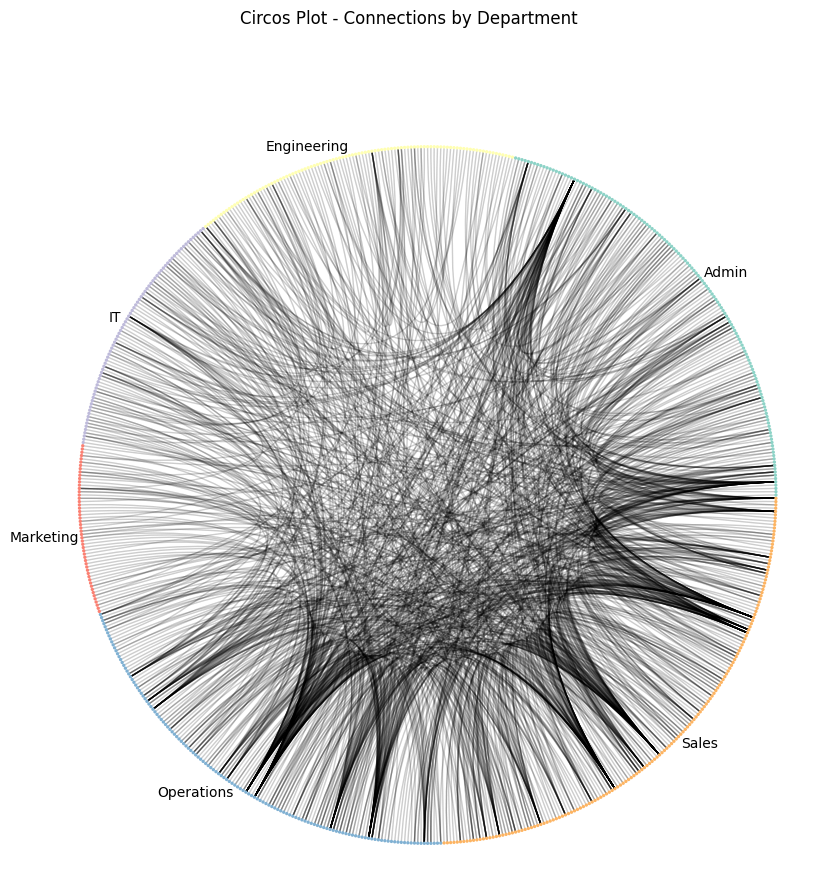

In [234]:
#Create a Circos plot, grouping the employee nodes by departmens
ap = nv.circos(G, node_color_by='department', group_by='department')
annotate.circos_group(G, group_by='department')
ap.figure.suptitle('Circos Plot - Connections by Department')
ap.figure.set(figheight=10, figwidth=15)
plt.show()

* Most active department is **Sales**
* Operations and Admin departments also have many connections 

In [235]:
#Calculate number of messages per department
num_messages = {}
for (source, target), weight in nx.get_edge_attributes(G, 'weight').items():
    for i in (source, target):
        n = G.nodes[i]
        if num_messages.get((n['department'])):
            num_messages[n['department']] += weight
        else:
            num_messages[n['department']] = weight

#Calculate number of messages per employee for department
message_per_employee = num_messages.copy()
emp_count = employees.groupby('department')['id'].count()
for key, value in message_per_employee.items():
    message_per_employee[key] = value / emp_count.loc[key]
message_per_employee

#Display Results in a Pandas DataFrame
result = pd.DataFrame([num_messages, message_per_employee], index=['Total Messages', 'Messages per Employee'])\
    .T.sort_values(by='Messages per Employee', ascending=False)
print('MESSAGES FOR DEPARTMENTS')
result

MESSAGES FOR DEPARTMENTS


,Total Messages,Messages per Employee
Sales,1724.00,10.71
Operations,1070.00,7.99
Admin,868.00,6.20
IT,227.00,2.95
Engineering,201.00,2.01
Marketing,98.00,1.88


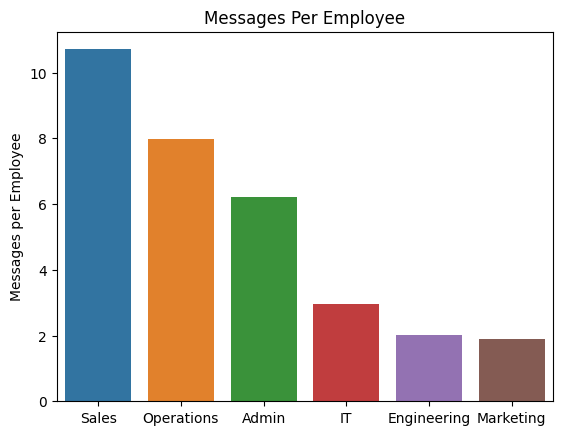

In [236]:
sns.barplot(x=result.index, y=result['Messages per Employee'])
plt.title('Messages Per Employee')
plt.show()

* This plot also shows that **Sales, Operations and Admin** employees have more messages

### Which employee has the most connections?  

In [237]:
#Initalize top node and create loop to find the node with most neighbors
top_node = -1
num_neighbors = -1
for node in G.nodes():
    if len(list(G.neighbors(node))) > num_neighbors:
        top_node = node
        num_neighbors = len(list(G.neighbors(node))) 
print(f'Employee with most connections: {top_node} - {G.nodes[top_node]}\nNumber of Neighbors: {num_neighbors}')

Employee with most connections: 598 - {'department': 'Operations', 'location': 'US', 'age': 38}
Number of Neighbors: 81


#### Subgraph and Analysis of Employee with most connections

In [238]:
#Get neighbors of node 598 and create a subgraph
top_node_neighbors = list(G.neighbors(598))
top_node_neighbors.append(598)
graph_598 = G.subgraph(top_node_neighbors)

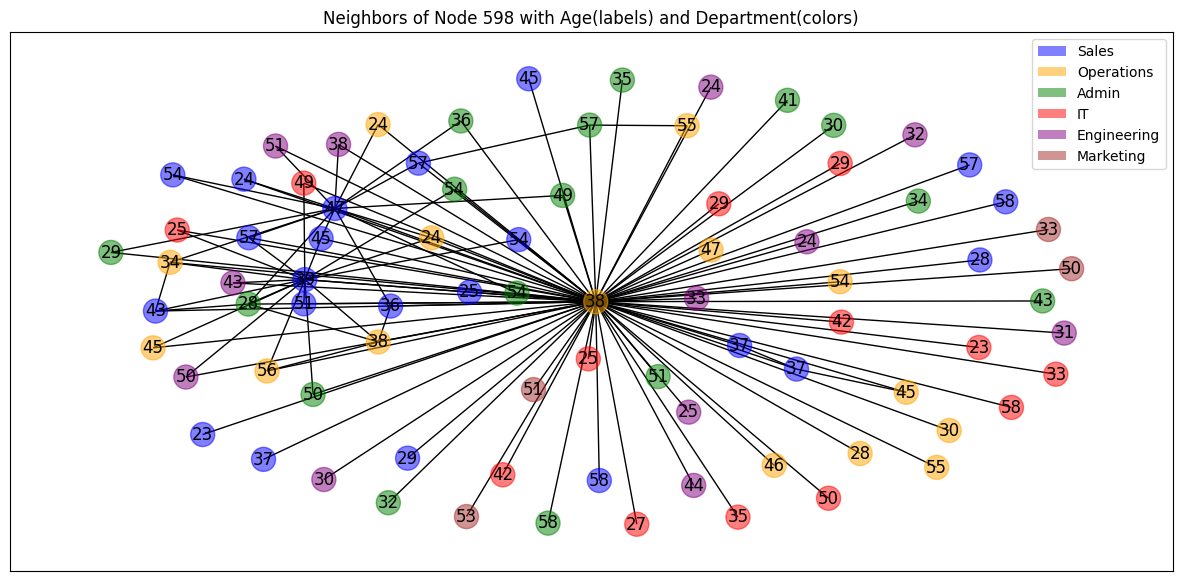

In [239]:
#Create colors for legend
color_dept = {'Sales':'blue', 'Operations':'orange', 'Admin':'green', 'IT':'red', 'Engineering':'purple', 'Marketing':'brown'}
node_colors = [color_dept[node[1]['department']] for node in graph_598.nodes(data=True)]

plt.figure(figsize=(15,7))
pos = nx.spring_layout(graph_598)
nx.draw_networkx_nodes(graph_598, pos, node_color=node_colors, alpha=0.5)
nx.draw_networkx_edges(graph_598, pos)
node_labels = nx.get_node_attributes(graph_598,'age')
nx.draw_networkx_labels(graph_598, pos, labels = node_labels)
plt.legend(handles=[Patch(facecolor=Color(val).hex, label=key, alpha=0.5) for key, val in color_dept.items()])
plt.title('Neighbors of Node 598 with Age(labels) and Department(colors)')
plt.show()

* Although top node is from operations most its neighbors are from sales. 
* This small graph also shows that sales employees are also highly connected within their department. 
* Ages are seem to be evenly distributed.

In [240]:
departments = []
ages = []
countries = []
for n in top_node_neighbors: 
    node = G.nodes[n]
    departments.append(node['department'])
    ages.append(node['age'])
    countries.append(node['location'])
print(f'Average Age of Neighbors: {np.mean(ages)}')

Average Age of Neighbors: 40.48780487804878


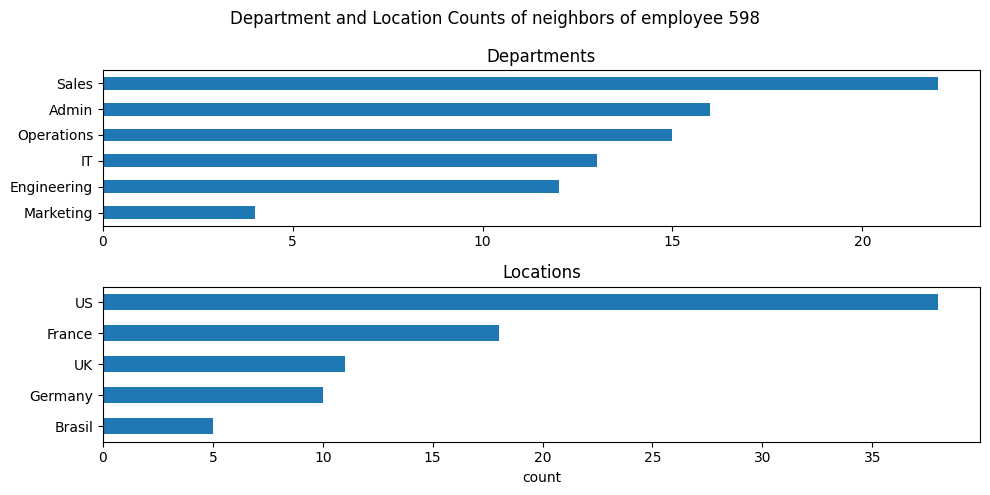

In [241]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
pd.Series(departments).value_counts().sort_values().plot(kind='barh', ax=axes[0])
pd.Series(countries).value_counts().sort_values().plot(kind='barh', ax = axes[1])
axes[0].set_title('Departments')
axes[1].set_title('Locations')
plt.xlabel('count')
fig.suptitle('Department and Location Counts of neighbors of employee 598')
plt.tight_layout()
plt.show()

### Identify the most influential departments and employees.

* Most influential deparment and employees can be identified with a centrality analysis

#### Centrality Analysis 

In [242]:
# Get the degree centrality and get top 10 employees
dc = nx.degree_centrality(G)
top_10 = list(sorted(dc, key=dc.get, reverse=True))[:10]

#Print the employees with highest centrality
print('EMPLOYEES WITH HIGH CENTRALITY')
for key in top_10: 
    print(f'Node {key} - {G.nodes[key]} \t- Degree Centrality: {dc[key]:.4f}')

EMPLOYEES WITH HIGH CENTRALITY
Node 598 - {'department': 'Operations', 'location': 'US', 'age': 38} 	- Degree Centrality: 0.1222
Node 144 - {'department': 'Sales', 'location': 'US', 'age': 50} 	- Degree Centrality: 0.1146
Node 128 - {'department': 'Sales', 'location': 'France', 'age': 47} 	- Degree Centrality: 0.1086
Node 605 - {'department': 'Admin', 'location': 'France', 'age': 31} 	- Degree Centrality: 0.1026
Node 586 - {'department': 'Operations', 'location': 'France', 'age': 38} 	- Degree Centrality: 0.0965
Node 389 - {'department': 'Sales', 'location': 'France', 'age': 39} 	- Degree Centrality: 0.0905
Node 317 - {'department': 'Operations', 'location': 'US', 'age': 37} 	- Degree Centrality: 0.0784
Node 509 - {'department': 'Admin', 'location': 'US', 'age': 39} 	- Degree Centrality: 0.0769
Node 337 - {'department': 'Sales', 'location': 'US', 'age': 37} 	- Degree Centrality: 0.0588
Node 260 - {'department': 'Operations', 'location': 'US', 'age': 48} 	- Degree Centrality: 0.0528


In [243]:
print(f'Most Central Node: {list(sorted(dc, key=dc.get, reverse=True))[0]}')

Most Central Node: 598


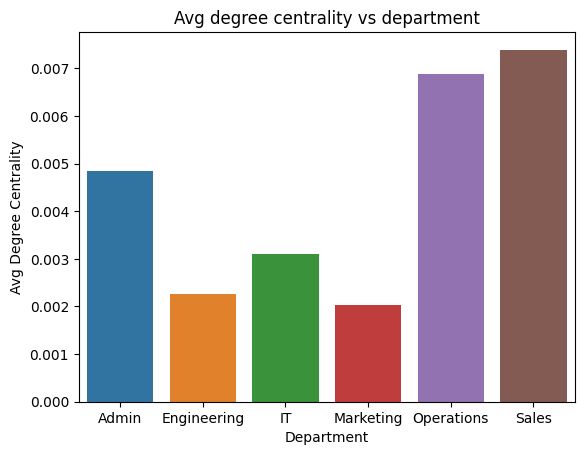

In [244]:
#get degree centrality on department basis
dept = {}
for key, value in nx.degree_centrality(G).items():
    node_dept =G.nodes[key]['department']
    if dept.get(node_dept):
        dept[node_dept].append(value)
    else:
        dept[node_dept] = [value]

#Create a dataframe for mean degree centrality for department
data = pd.DataFrame(pd.Series(dept).apply(np.mean).sort_index().reset_index())
data.columns = ['department', 'dc']

#Create a barplot of Degree Centrality and department
sns.barplot(x='department', y='dc', data=data)
plt.xlabel('Department')
plt.ylabel('Avg Degree Centrality')
plt.title('Avg degree centrality vs department')
plt.show()

* Operations and Sales departments are more active & connected, both having significantly higher degree centrality

### Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?
* We can use betweenness centrality analysis to see which employees & departments serve as connection hubs

#### Betweenness Centrality Analysis 

In [245]:
# Get the degree centrality and get top 10 employees
dc = nx.betweenness_centrality(G)
top_10 = list(sorted(dc, key=dc.get, reverse=True))[:10]

#Print the employees with highest centrality
print('EMPLOYEES WITH HIGH BETWENNESS CENTRALITY')
for key in top_10: 
    print(f'Node {key} - {G.nodes[key]} \t- Betweenness Centrality: {dc[key]:.4f}')

EMPLOYEES WITH HIGH BETWENNESS CENTRALITY
Node 598 - {'department': 'Operations', 'location': 'US', 'age': 38} 	- Betweenness Centrality: 0.1989
Node 144 - {'department': 'Sales', 'location': 'US', 'age': 50} 	- Betweenness Centrality: 0.1755
Node 128 - {'department': 'Sales', 'location': 'France', 'age': 47} 	- Betweenness Centrality: 0.1369
Node 586 - {'department': 'Operations', 'location': 'France', 'age': 38} 	- Betweenness Centrality: 0.1300
Node 605 - {'department': 'Admin', 'location': 'France', 'age': 31} 	- Betweenness Centrality: 0.1156
Node 509 - {'department': 'Admin', 'location': 'US', 'age': 39} 	- Betweenness Centrality: 0.1105
Node 389 - {'department': 'Sales', 'location': 'France', 'age': 39} 	- Betweenness Centrality: 0.1081
Node 317 - {'department': 'Operations', 'location': 'US', 'age': 37} 	- Betweenness Centrality: 0.0884
Node 337 - {'department': 'Sales', 'location': 'US', 'age': 37} 	- Betweenness Centrality: 0.0695
Node 260 - {'department': 'Operations', 'loca

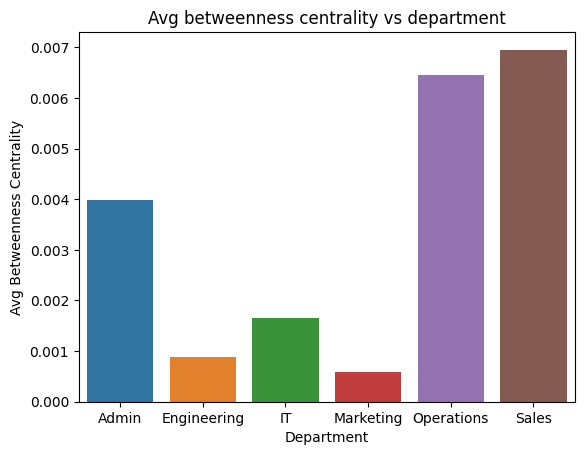

In [246]:
#get betweenness centrality on department basis
dept = {}
for key, value in nx.betweenness_centrality(G).items():
    node_dept =G.nodes[key]['department']
    if dept.get(node_dept):
        dept[node_dept].append(value)
    else:
        dept[node_dept] = [value]

#Create a dataframe for mean betweenness centrality for department
data = pd.DataFrame(pd.Series(dept).apply(np.mean).sort_index().reset_index())
data.columns = ['department', 'dc']

#Create a barplot of Betweenness Centrality and department
sns.barplot(x='department', y='dc', data=data)
plt.xlabel('Department')
plt.ylabel('Avg Betweenness Centrality')
plt.title('Avg betweenness centrality vs department')
plt.show()

* Our company can boost cross-functional cooperation if it can focus on increasing connections of IT, Engineering and Marketing departments, so that they can play a more central role in the overall organization network. 

#### Degree Centrality with Age

In [247]:
age = {}
for key, value in nx.degree_centrality(G).items():
    node_age =G.nodes[key]['age']
    if age.get(node_age):
        age[node_age].append(value)
    else:
        age[node_age] = [value]
data = pd.DataFrame(pd.Series(age).apply(np.mean).sort_index().reset_index())
data.columns = ['age', 'dc']

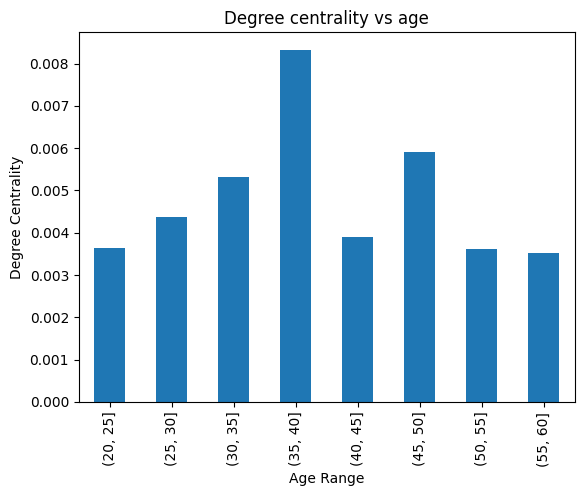

In [248]:
data.groupby(pd.cut(data['age'], bins=np.arange(20,61,5)))['dc'].mean().plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Degree Centrality')
plt.title('Degree centrality vs age')
plt.show()

- Age range 35-50 have higher degree centrality
- Increasing connections and activity for younger and more senior employees will be useful for transfer of knowledge and experience

## Neighbor, Length and Date Analysis

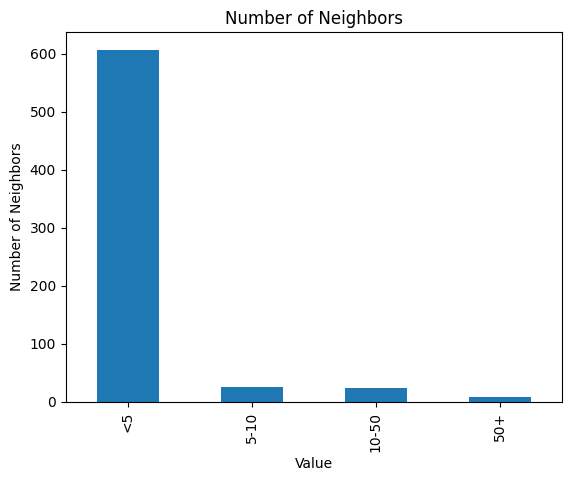

In [249]:
#Calculate number of neighbors per employee
num_neighbors = []
for n in G.nodes():
	num_neighbors.append(len(list(G.neighbors(n))))
    
#Plot in a barchart
data= pd.cut(num_neighbors, bins=[0, 5, 10, 50, 1000], labels=['<5', '5-10', '10-50', '50+']).value_counts()
data.plot(kind='bar')
plt.title('Number of Neighbors')
plt.xlabel('Value')
plt.ylabel('Number of Neighbors')
plt.show()

* Most employees have less then 5 connections in the network

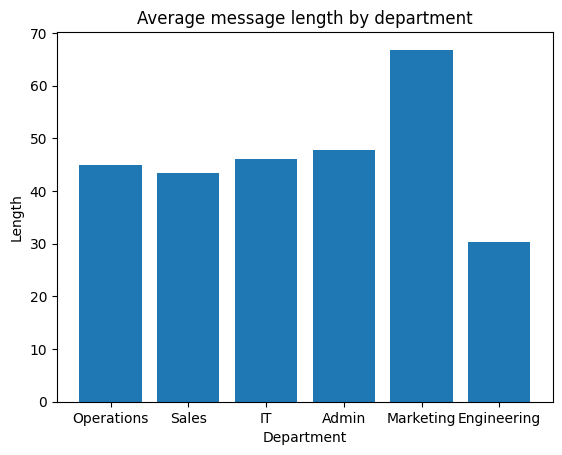

In [250]:
#Calculate average message lenght per department
message_length = {}
for s, r, d in G.edges(data=True):
    dept = G.nodes()[s]['department']
    if message_length.get(dept):
        message_length[dept].append(d['message_length'])
    else:
        message_length[dept] = [d['message_length']]
for key, value in message_length.items():
	message_length[key] = np.mean(value).round(1)
    
#Plot in a barchart    
plt.title('Average message length by department')
plt.xlabel('Department')
plt.ylabel('Length')
plt.bar(message_length.keys(), message_length.values())
plt.show()

* Average message length is around 45-50 except Marketing and Engineering departments

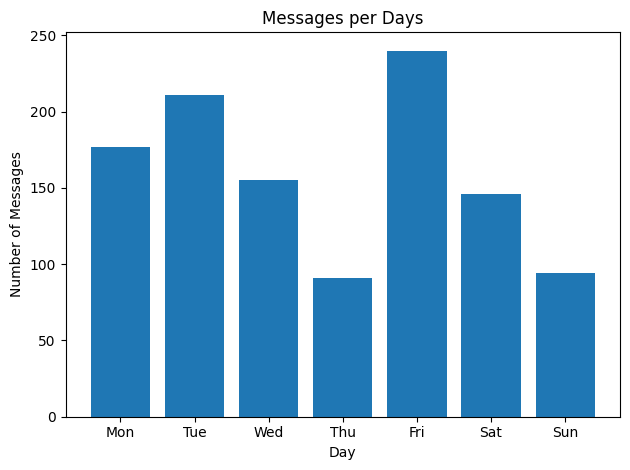

In [251]:
#Calculate message count for each day
days = {}
for s, r, d in G.edges(data=True):
    day = d['timestamp'].dayofweek
    if days.get(day):
        days[day] += 1
    else:
        days[day] = 1

days = pd.Series(days)  
days.index = ['Mon','Tue','Wed', 'Thu','Fri','Sat', 'Sun']
    
#Plot in a barchart
fig, ax = plt.subplots()
plt.title('Messages per Days')
plt.xlabel('Day')
plt.ylabel('Number of Messages')
plt.bar(days.index, days)
plt.tight_layout()
plt.show()

*  Most messages are sent on Friday

## Conclusion

* Sales, Operation and Admin departments are already active and play a central role in relationships. Increasing connections for other departments will have a positive effect on overall collaboration.
* Employees with few relationships can be encouraged for more connection, most employees have less than 5 connections in the network. 
* Average lenght of messages sent by Marketing and Engineering departments seem to differ from others. This can be further analyzed on indiviual level. 
* Further analysis can be made on connections within each department, number of messages in each conversation and dates